# Modified Randomized Hough transform 
### The randomized hough transform is an algorithm used to detect lines and shapes in 2d images 
In this Notebook I will be implenting the algorithm to detect eliptical patterns from a set of points in a three dimensional cartesian coordinate system.

In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import itertools


# Artificial Elipse Test Data Generator
### We create a set of data points in eliptical pattern to test randomized hough transform algorithm, a small deviance is generated to later asses how accurate algorithm performs when noise is present 

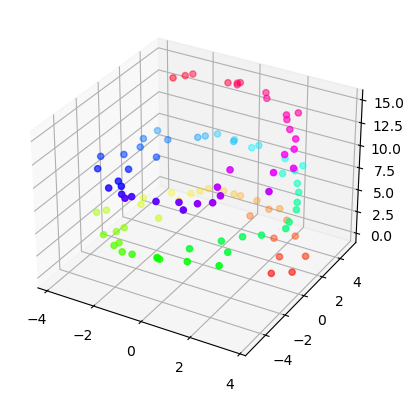

In [3]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = np.linspace(0,15,100)
x_points = 3 * np.cos(z_points) + 0.5 * np.random.randn(100)
y_points = 5 * np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')
data = np.column_stack((x_points,y_points,z_points))
plt.show()
plt.close('all')


# The algorithm

In [11]:
#, min_altitutde, max_altitude, grid_unit_size, latitude_distance, longitude_distance
class detectEllipse():
    def __init__(self,xvals, yvals) -> None:
        self.__xvals = xvals
        self.__yvals = yvals
        self.__minDist = 4
        self.__max_height = 10
        self.__accumulatorSize = 10
        self.__minVoteCandidate = 0.7
    #def findEllipse( xvals, yvals ):
        
    def __getCandidateVals(self, p1,p2):
        accumulator = np.zeros(self.__accumulatorSize)
        self.midpoint = np.array([(self.__xvals[p1] + self.__xvals[p2])/2, (self.__yvals[p1]+self.__yvals[p2])/2])
        self.pointA = ([self.__xvals[p1],self.__yvals[p1]])
        self.pointB = ([self.__xvals[p2],self.__yvals[p2]])
        self.majAxVal = np.sqrt(np.square(self.__xvals[p2]-self.__xvals[p1])+np.square(self.__yvals[p2]-self.__yvals[p1]))/2
        #self.majAxPoints = np.array(self.pointA,self.pointB)
        self.majAxVal2 = np.square(self.majAxVal)
        self.alphaVal = np.arctan((self.__yvals[p2]-self.__yvals[p1])/(self.__xvals[p2]-self.__xvals[p1]))
        stopPoint = (p2-p1) + p2
        for i in range(p1,  stopPoint):
            vote = round(self.__calcVoteVals(i))
            if (vote > 0 & vote < self.__accumulatorSize ):
                accumulator[vote] += 1
        totalVotes = stopPoint-p1
        for j in range(self.__accumulatorSize):
            
            if(accumulator[j]/totalVotes > self.__minVoteCandidate):
                return j
        
        #return {'midpoint': self.midpoint, 'majAxis': self.majAxVal, 'alphaVal' :self.alphaVal}
        
    def __calcVoteVals(self, p1):
        point = np.array([self.__xvals[p1],self.__yvals[p1]])
        distSq =  np.square(self.midpoint[0]-self.__xvals[p1])+np.square(self.midpoint[1]-self.__yvals[p1])
        dist = np.sqrt(distSq)
        distToOrigin = min(np.linalg.norm(self.pointA-point), np.linalg.norm(self.pointB-point))
        cos2T =np.square( (self.majAxVal2 + distSq - distToOrigin)/(2*self.majAxVal*dist))
        bValCandidate = np.sqrt((self.majAxVal2 * distSq*(1-cos2T) )/(self.majAxVal2-distSq*cos2T))
        return bValCandidate    
    
    def _detectEllipse(self):
        
        for p1 in range(self.__xvals.size ) :
            results = [ self.__getCandidateVals(p1,p2) for p2 in range(p1, self.__xvals.size) if self.__checkMinDist(p1,p2) == True ]
            print(results)
        #print(self.__minDist)

    def __checkMinDist(self ,p1,p2):
        validCandidate = False
        dist = np.sqrt(np.square( self.__xvals[p2] - self.__xvals[p1] )+np.square( self.__yvals[p2] - self.__yvals[p1] ))
        if(dist > self.__minDist):
            validCandidate = True
        return validCandidate


In [9]:
point1 = np.array([4,4])
point2 = np.array([8,8])
dist = np.linalg.norm(point1-point2)
print(dist)
res = 4* np.sqrt(2)
print(res)

5.656854249492381
5.656854249492381


In [12]:
myEllipse = detectEllipse(x_points,y_points)
myEllipse._detectEllipse()



TypeError: Field elements must be 2- or 3-tuples, got '0.4198501481215815'

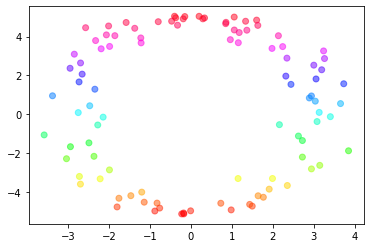

In [5]:

plt.scatter(x_points, y_points,cmap='hsv', c=y_points,alpha=0.5)
plt.show()